# Exercício

## Função erro

Considere a integral

$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x \mathrm{e}^{-t^2}\ \mathrm{d}t.
$$

Note que esta é uma integral definida, sobre a variável $t$, com o limite superior variável. Ou seja, o resultado é uma função de $x$, chamada de *função erro*, que aparece muito em cálculos de probabilidade. Não existe maneira conhecida de resolver esta integral analiticamente. A única forma de resolvê-la é numericamente.

**a.** Calcule numericamente $\mathrm{erf}(x=1)$. Escolha você mesmo o método (exceto a regra retangular) e o número de intervalos. Não esqueça de fazer um print do resultado.

*Resposta*: $\mathrm{erf}(1.0) \cong 0.8427$.

In [1]:
import numpy as np

def integrando(x):
    return np.exp(-x**2)

lim1 = 0.0
lim2 = 1.0

def integralSimpson(N):
    h = (lim2 - lim1) / N
    integralImp = 0
    integralPar = 0
    integral = 0
    xi = 0

    for i in range(1, N, 2): #impares
        xi = lim1 + i*h
        integralImp += integrando(xi)
        
    xi = 0
    for i in range(2, N, 2): #pares
        xi = lim1 + i*h
        integralPar += integrando(xi)
        
    integral = h * (4 * integralImp + 2 * integralPar + integrando(lim1) + integrando(lim2)) / 3
    resultado = 2 * integral / (np.sqrt(np.pi))
    return resultado

print(integralSimpson(6))

0.8427078551103628


**b.** Programe a função abaixo tal que ela calcule $\mathrm{erf}(x)$ para um $x$ qualquer passado como parâmetro.
Utilizando a função que você programou, calcule $\mathrm{erf}(1.0)$. O resultado deve ser igual ao do item anterior.

In [2]:
def integralSimpsonGeral(f, a, b, N):
    h = (b - a) / N
    integralImp = 0
    integralPar = 0
    integral = 0
    xi = 0

    for i in range(1, N, 2): #impares
        xi = a + i*h
        integralImp += f(xi)
        
    xi = 0
    for i in range(2, N, 2): #pares
        xi = a + i*h
        integralPar += f(xi)
        
    integral = h * (4 * integralImp + 2 * integralPar + f(a) + f(b)) / 3
    resultado = 2 * integral / (np.sqrt(np.pi))
    return resultado


erf_1 = integralSimpsonGeral(integrando, lim1, lim2, 6)
print(f'erf(1.0) = {erf_1:.4f}')

erf(1.0) = 0.8427


**c.** Usando a função programada acima, faça o gráfico de $\mathrm{erf}(x)$ para $-3 < x < 3$, com pontos em intervalos de $0.1$. Não esqueça das etiquetas dos eixos e do título.

Compare o seu gráfico com o que aparece na [página da Wikipedia sobre função erro](https://en.wikipedia.org/wiki/Error_function), para saber se o resultado está correto.

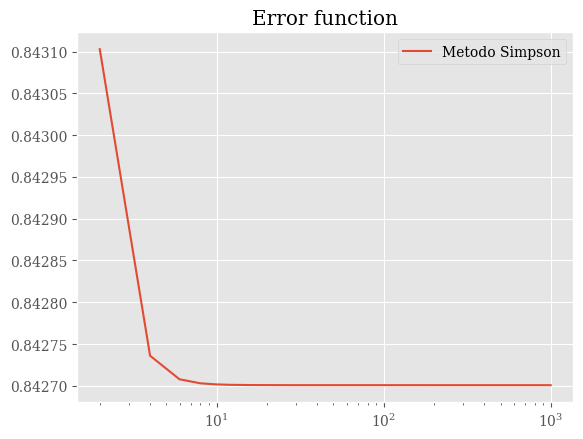

In [3]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

lista_N = []
lista_Int = []
for n in range(2, 1000, 2): #errado
    lista_N.append(n)
    lista_Int.append(integralSimpsonGeral(integrando, lim1, lim2, n))

fig, ax = plt.subplots()
ax.plot(lista_N, lista_Int, label="Metodo Simpson")
ax.set_xscale('log')
ax.set_title("Error function")
ax.legend()
plt.show()